# US Youtube Trending Data

# Background of the Study
YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views,  comments and likes).


## Problem Statement
Client wants to know **What factor matter the most to Youtube Trending algorithm**. This information would benefit the client to help them to achive Trending on their Youtube Channel. 

As *data analyst*, We will try to answer these following questions:

**What are the characteristics of Trending videos on Youtube, especially compared to not trending at all?**
* Are there any correlation between feature?
* Are there any differences between Trending and Not Trending `views`?
* Are there any differences between Trending and Not Trending `likes`?
* Are there any differences between Trending and Not Trending `dislikes`?
* Are there any differences between Trending and Not Trending `comments`?
* Are there any differences between Trending and Not Trending `description`?
* Are there any differences between Trending and Not Trending `tags`?
* What are the maximum number of days to trending status for a video?
* **From which category users like videos the most?**


## What determines if a video is ranked on Trending?
Amongst the many great new videos on YouTube on any given day, Trending can only show a limited number. Trending aims to surface videos that:

- Are appealing to a `wide range of viewers`
- Are not misleading, clickbaity or sensational
- Capture the breadth of what’s happening on YouTube and in the world
- Showcase a diversity of creators
- Ideally, are surprising or novel

## Trending aims to balance all of these considerations. To achieve this, Trending considers many signals, including (but not limited to):

- `View count`
- How quickly the video is generating views (i.e. `“temperature”`)
- Where views are coming from, including outside of YouTube
- The age of the video
- How the video performs compared to other recent uploads from the same channel (`average views`)

Importing Library

In [281]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
from datetime import datetime
import matplotlib.pyplot as plt

# Load JSON dataset
to extract category id and category title

In [282]:
# Set Option to See All Columns
pd.set_option('display.max_colwidth', None)
# Load file.json dataset
df_json = pd.read_json('US_category_id.json')
df_json.head(3)

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ""', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}"
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA""', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}"
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg""', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}}"


In [283]:
# Knowing Unique Value for each Columns
df_json.describe()

# From this we know that, 'kind' and 'etag' columns for all rows are the same and no information that we could get.

,kind,etag,items
count,32,32,32
unique,1,1,32
top,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ""', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}"
freq,32,32,1


In [284]:
# Indexing just 'items' column
df_json.loc[:,['items']].head(3)


# From this we know that, inside 'items' column there are 'id' & 'title'
# I would assume this data contains 'id' as category id & 'title' as title for each unique category id

,items
0,"{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ""', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}"
1,"{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA""', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}"
2,"{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg""', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}}"


## Accessing 'id' category


In [285]:
# Accessing category id
df_json.loc[:,['items']].iloc[0,0]['id']

'1'

## Accessing 'title' category

In [286]:
# accessing category id title
df_json.loc[:,['items']].iloc[0,0]['snippet']['title']

'Film & Animation'

## Using For Loop
for getting each id number and id title

In [287]:
# Getting each id number and id title
list_id = []
list_title = []

for i in df_json.loc[:,'items']:
    list_id.append(i['id'])
    list_title.append(i['snippet']['title'])

print(list_id)
print(list_title)

['1', '2', '10', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44']
['Film & Animation', 'Autos & Vehicles', 'Music', 'Pets & Animals', 'Sports', 'Short Movies', 'Travel & Events', 'Gaming', 'Videoblogging', 'People & Blogs', 'Comedy', 'Entertainment', 'News & Politics', 'Howto & Style', 'Education', 'Science & Technology', 'Nonprofits & Activism', 'Movies', 'Anime/Animation', 'Action/Adventure', 'Classics', 'Comedy', 'Documentary', 'Drama', 'Family', 'Foreign', 'Horror', 'Sci-Fi/Fantasy', 'Thriller', 'Shorts', 'Shows', 'Trailers']


## Making Dataframe containing 'id_category' and 'category'

In [288]:
# Creating data frame
df_new_json = pd.DataFrame({'category_id':list_id, 'category':list_title})

# Casting as int64 to match the id for future join
df_new_json['category_id'] = df_new_json['category_id'].astype(np.int64)

df_new_json

,category_id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [289]:
# Checking data type
df_new_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category_id  32 non-null     int64 
 1   category     32 non-null     object
dtypes: int64(1), object(1)
memory usage: 640.0+ bytes


## Exporting

In [290]:
# Exporting 'category_id' and 'category' as CSV format
# df_new_json.to_csv('category_id.csv', index=False)

# Load CSV dataset

In [291]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

# Set option to limited the column width by 50 character
pd.set_option('display.max_colwidth', 50)

# Loading dataset without whitespace
df = pd.read_csv('USvideos.csv', skipinitialspace=True)
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

This Dataset contains 16 columns in USvideos.csv, such as:  

* `video_id` : unique ID for each video.
* `trending_date`: daily date record of the YouTube videos.
* `title` : the title of the video.
* `channel_title` : name of the channel.
* `category_id` : unique ID for each video category. (further join with JSON file)
* `publish_time` : publishing video date.
* `tags` : video tags.
* `views` : videos view count.
* `likes` : videos like count.
* `dislikes` : videos dislike count.
* `comment_count` : videos comment count.
* `thumbnail_link` : videos thumbnail link.
* `comments_disabled` : contains of boolean of whether the comment section is disabled.
* `ratings_disabled` : contains of boolean of whether the rating video is disabled.
* `video_error_or_removed` : contains of boolean of whether the video from that channel has been removed.
* `description` : description box of the videos.



## Joining 2 columns on 'category_id' column
so the Main Data Frame has category title for each channel

In [293]:
# Inner Join
# for Outer Join we will discuss later (category that's not on the list)

df = pd.merge(df, df_new_json, how='inner', left_on='category_id', right_on='category_id')

# don't run this cell several times, rather use run all, or run from load dataset

# Data
This dataset is a daily record of the top trending YouTube videos.

In [294]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,18.02.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1324482,22413,608,1644,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows
40945,V6ElE2xs48c,18.03.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1332252,22461,610,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows
40946,V6ElE2xs48c,18.04.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1340039,22504,615,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows
40947,V6ElE2xs48c,18.05.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1345086,22542,615,1649,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows


In [295]:
df.info()

# From here we know that 'publish_time' and 'trending_date' not as a date / time series data type
# rather as an object data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [296]:
# Checking NaN values
df.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
category                    0
dtype: int64

In [297]:
# Checking 'description' column that are NaN

df[df['description'].isna()]

# From here I discovered that 'tags' column has '[none]' string assign as NaN value
# since it is a string, python can not detect that as NaN value

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
71,aujUl3yt6nM,17.19.11,Quad9 How To Install with Windows,Quad9 DNS,22,2017-11-16T01:56:43.000Z,"DNS|""privacy""|""security""",4759,40,2,13,https://i.ytimg.com/vi/aujUl3yt6nM/default.jpg,False,False,False,NaN,People & Blogs
84,aujUl3yt6nM,17.20.11,Quad9 How To Install with Windows,Quad9 DNS,22,2017-11-16T01:56:43.000Z,"DNS|""privacy""|""security""",5218,42,2,13,https://i.ytimg.com/vi/aujUl3yt6nM/default.jpg,False,False,False,NaN,People & Blogs
99,aujUl3yt6nM,17.21.11,Quad9 How To Install with Windows,Quad9 DNS,22,2017-11-16T01:56:43.000Z,"DNS|""privacy""|""security""",5963,47,2,13,https://i.ytimg.com/vi/aujUl3yt6nM/default.jpg,False,False,False,NaN,People & Blogs
104,kKFNThEiilU,17.22.11,Voices,Doug Jones for Senate,22,2017-11-21T02:30:47.000Z,[none],49472,430,155,210,https://i.ytimg.com/vi/kKFNThEiilU/default.jpg,False,False,False,NaN,People & Blogs
119,kKFNThEiilU,17.23.11,Voices,Doug Jones for Senate,22,2017-11-21T02:30:47.000Z,[none],84038,823,340,486,https://i.ytimg.com/vi/kKFNThEiilU/default.jpg,False,False,False,NaN,People & Blogs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40278,Ld57wNXddGU,18.18.02,best pirate i've ever seen,hwow,20,2018-02-09T14:56:43.000Z,"best pirate i've ever seen|""best""|""pirate""|""i'...",205209,5147,57,187,https://i.ytimg.com/vi/Ld57wNXddGU/default.jpg,False,False,False,NaN,Gaming
40866,ZYKUXMAou3Q,18.02.02,Rose McGowan Shares Her Thoughts On 'Time's Up...,The View,29,2018-01-30T16:50:26.000Z,"Rose McGowan|""Rose's Army""|""MeToo""|""Time's Up""...",225051,3075,702,1439,https://i.ytimg.com/vi/ZYKUXMAou3Q/default.jpg,False,False,False,NaN,Nonprofits & Activism
40867,ZYKUXMAou3Q,18.04.02,Rose McGowan Shares Her Thoughts On 'Time's Up...,The View,29,2018-01-30T16:50:26.000Z,"Rose McGowan|""Rose's Army""|""MeToo""|""Time's Up""...",267065,3527,769,1280,https://i.ytimg.com/vi/ZYKUXMAou3Q/default.jpg,False,False,False,NaN,Nonprofits & Activism
40868,ZYKUXMAou3Q,18.05.02,Rose McGowan Shares Her Thoughts On 'Time's Up...,The View,29,2018-01-30T16:50:26.000Z,"Rose McGowan|""Rose's Army""|""MeToo""|""Time's Up""...",281983,3683,784,1365,https://i.ytimg.com/vi/ZYKUXMAou3Q/default.jpg,False,False,False,NaN,Nonprofits & Activism


In [298]:
# Checking the '[none]' string
df[df['tags']=='[none]'].head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
12,1640fZpYBSY,17.14.11,I love the Price is Right! Wooo! -Kevin,Anaki Abo,22,2017-11-07T18:54:39.000Z,[none],358597,1211,72,593,https://i.ytimg.com/vi/1640fZpYBSY/default.jpg,False,False,False,Price is Right contestant plays for a car.,People & Blogs
15,wRGldR_SQAA,17.14.11,Apple Clips sample,Steve Kovach,22,2017-11-09T18:01:04.000Z,[none],2259,0,0,0,https://i.ytimg.com/vi/wRGldR_SQAA/default.jpg,False,False,False,Clips 2.0 lets you use augmented reality and s...,People & Blogs


In [299]:
# Changing the '[none]' string as NaN value
# There are 2 ways:

# Number 1
# using .replace()
# df['tags'].replace(to_replace='[none]', value=np.nan)

# Number 2
# using np.where()
df['tags'] = np.where(df['tags']=='[none]', np.nan, df['tags'])
df['tags']

0                                          SHANtell martin
1                                cute|"cats"|"thai"|"eggs"
2        shawn johnson|"andrew east"|"shawn east"|"shaw...
3        itsgrace|"funny"|"comedy"|"vlog"|"grace"|"helb...
4        wearing online dollar store makeup for a week|...
                               ...                        
40944    bleacher report|"br"|"nba"|"Stan Van Gundy"|"J...
40945    bleacher report|"br"|"nba"|"Stan Van Gundy"|"J...
40946    bleacher report|"br"|"nba"|"Stan Van Gundy"|"J...
40947    bleacher report|"br"|"nba"|"Stan Van Gundy"|"J...
40948    bleacher report|"br"|"nba"|"Stan Van Gundy"|"J...
Name: tags, Length: 40949, dtype: object

In [300]:
# Let's check again
df[df['tags']=='[none]'].head(2)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category


In [301]:
# Now we know that there are more NaN values
df.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                      1535
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description                570
category                     0
dtype: int64

Since `NaN values` is located on columns that `may affect` Trending videos, it would filled later on.

## Binning Views

In [302]:
# Binning views for each videos
df.loc[df['views'].between(200000000, df[['views']].describe().loc['max'][0], 'both'), 'view_class'] = '200M'
df.loc[df['views'].between(100000000, 199999999, 'both'), 'view_class'] = '100M'
df.loc[df['views'].between(50000000, 99999999, 'both'), 'view_class'] = '50-90M'
df.loc[df['views'].between(10000000, 49999999, 'both'), 'view_class'] = '10-40M'
df.loc[df['views'].between(5000000, 9999999, 'both'), 'view_class'] = '5-9M'
df.loc[df['views'].between(1000000, 4999999, 'both'), 'view_class'] = '1-4M'
df.loc[df['views'].between(500000, 999999, 'both'), 'view_class'] = '500-900K'
df.loc[df['views'].between(100000, 499999, 'both'), 'view_class'] = '100-400K'
df.loc[df['views'].between(50000, 99999, 'both'), 'view_class'] = '50-90K'
df.loc[df['views'].between(10000, 49999, 'both'), 'view_class'] = '10-40K'
df.loc[df['views'].between(0, 9999, 'both'), 'view_class'] = '< 10K'

In [303]:
# Casting 'view_class' as category
df['view_class'] = df['view_class'].astype('category')

## Publish Column

### Publish Date

In [304]:
# Getting 'publish_time' DATE
def split_year(year):
    return re.findall('(\d{4}-\d{2}-\d{2})', year)[0]
df['publish_time_year'] = df['publish_time'].apply(split_year)
df['publish_time_year']

0        2017-11-13
1        2017-04-21
2        2017-11-11
3        2017-11-11
4        2017-11-11
            ...    
40944    2018-05-10
40945    2018-05-10
40946    2018-05-10
40947    2018-05-10
40948    2018-05-10
Name: publish_time_year, Length: 40949, dtype: object

In [305]:
df['publish_time_year'] = pd.to_datetime(df['publish_time_year'])

### Publish Time

In [306]:
# Getting 'publish_time' TIME
def split_time(time):
    return re.findall('T(\d{2}:\d{2}:\d{2})', time)[0]
df['publish_time'] = df['publish_time'].apply(split_time)
df['publish_time']

0        17:13:01
1        06:47:32
2        15:00:03
3        18:08:04
4        01:19:33
           ...   
40944    21:01:22
40945    21:01:22
40946    21:01:22
40947    21:01:22
40948    21:01:22
Name: publish_time, Length: 40949, dtype: object

In [307]:
# Casting 'publish_time' to datetime64[ns] data type
df['publish_time'] = pd.to_datetime(df['publish_time'],format= '%H:%M:%S' ).dt.time

## Trending Date Column

In [308]:
# Splitting 'trending_date'
df['trending_date'].str.split('.', expand=True)

,0,1,2
0,17,14,11
1,17,14,11
2,17,14,11
3,17,14,11
4,17,14,11
...,...,...,...
40944,18,02,06
40945,18,03,06
40946,18,04,06
40947,18,05,06


### Year

In [309]:
# Getting 'trending_date' year
df['trending_date_year'] = df['trending_date'].str.split('.', expand=True)[0].astype(int) + 2000
df['trending_date_year']


0        2017
1        2017
2        2017
3        2017
4        2017
         ... 
40944    2018
40945    2018
40946    2018
40947    2018
40948    2018
Name: trending_date_year, Length: 40949, dtype: int32

### Month

In [310]:
# Getting 'trending_date' month
df['trending_date_month'] = df['trending_date'].str.split('.', expand=True)[2].astype(int)
df['trending_date_month']

0        11
1        11
2        11
3        11
4        11
         ..
40944     6
40945     6
40946     6
40947     6
40948     6
Name: trending_date_month, Length: 40949, dtype: int32

### Date

In [311]:
# Getting 'trending_date' date
df['trending_date_date'] = df['trending_date'].str.split('.', expand=True)[1].astype(int)
df['trending_date_date']

0        14
1        14
2        14
3        14
4        14
         ..
40944     2
40945     3
40946     4
40947     5
40948     6
Name: trending_date_date, Length: 40949, dtype: int32

### Casting datetime data type

In [312]:
# Combining in 1 column and casting it to datetime64[ns] data type
df2 = df[["trending_date_year", "trending_date_month", "trending_date_date"]].copy()
df2.columns = ["year", "month", "day"]
df['trending_date'] = pd.to_datetime(df2)
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_class,publish_time_year,trending_date_year,trending_date_month,trending_date_date
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,500-900K,2017-11-13,2017,11,14
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,06:47:32,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,50-90K,2017-04-21,2017,11,14
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,100-400K,2017-11-11,2017,11,14
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,18:08:04,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,100-400K,2017-11-11,2017,11,14
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,01:19:33,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs,1-4M,2017-11-11,2017,11,14


In [313]:
df.info()

# 'trending_date' column is now datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  object        
 1   trending_date           40949 non-null  datetime64[ns]
 2   title                   40949 non-null  object        
 3   channel_title           40949 non-null  object        
 4   category_id             40949 non-null  int64         
 5   publish_time            40949 non-null  object        
 6   tags                    39414 non-null  object        
 7   views                   40949 non-null  int64         
 8   likes                   40949 non-null  int64         
 9   dislikes                40949 non-null  int64         
 10  comment_count           40949 non-null  int64         
 11  thumbnail_link          40949 non-null  object        
 12  comments_disabled       40949 non-null  bool  

## Difference Publish - Trending

In [314]:
# Counting video temperature
df['video_temperature'] = df['trending_date'] - df['publish_time_year']

In [315]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_class,publish_time_year,trending_date_year,trending_date_month,trending_date_date,video_temperature
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,500-900K,2017-11-13,2017,11,14,1 days
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,06:47:32,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,50-90K,2017-04-21,2017,11,14,207 days
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,100-400K,2017-11-11,2017,11,14,3 days
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,18:08:04,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,100-400K,2017-11-11,2017,11,14,3 days
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,01:19:33,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs,1-4M,2017-11-11,2017,11,14,3 days


## Transform 'trending_date'
each video data taken periodically, this step later-on to filter multiple video_id 

In [316]:
df.groupby('video_id')['trending_date'].max()


video_id
-0CMnp02rNY   2018-06-11
-0NYY8cqdiQ   2018-02-01
-1Hm41N0dUs   2018-05-01
-1yT-K3c6YI   2017-12-02
-2RVw2_QyxQ   2017-11-16
                 ...    
zwEn-ambXLw   2018-04-06
zxUwbflE1SY   2017-11-19
zxwfDlhJIpw   2018-05-25
zy0b9e40tK8   2017-11-14
zzQsGL_F9_c   2018-02-06
Name: trending_date, Length: 6351, dtype: datetime64[ns]

In [317]:
# Assigning max trending date for each video
df['max_trending_date'] = df.groupby('video_id')['trending_date'].transform('max')

In [318]:
# Checking the groupby transform
df[df['video_id']=='0mlNzVSJrT0']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_class,publish_time_year,trending_date_year,trending_date_month,trending_date_date,video_temperature,max_trending_date
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,06:47:32,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,50-90K,2017-04-21,2017,11,14,207 days,2017-11-17
19,0mlNzVSJrT0,2017-11-15,Me-O Cats Commercial,Nobrand,22,06:47:32,"cute|""cats""|""thai""|""eggs""",120817,2896,210,594,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,100-400K,2017-04-21,2017,11,15,208 days,2017-11-17
35,0mlNzVSJrT0,2017-11-16,Me-O Cats Commercial,Nobrand,22,06:47:32,"cute|""cats""|""thai""|""eggs""",121979,2901,210,595,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,100-400K,2017-04-21,2017,11,16,209 days,2017-11-17
49,0mlNzVSJrT0,2017-11-17,Me-O Cats Commercial,Nobrand,22,06:47:32,"cute|""cats""|""thai""|""eggs""",122634,2908,210,595,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,100-400K,2017-04-21,2017,11,17,210 days,2017-11-17


## Average Channel Views Column
This step determines whether the video of that channel `trending` or not. <br><br>
Trending video is when their views count video exceeding their average channel views.
[source: `Youtube Help Center`]

In [319]:
# Assigning to each channel_title their average view count
df.groupby('channel_title')['views'].transform('mean')

0        2.449950e+06
1        1.160990e+05
2        3.866858e+05
3        2.316870e+05
4        3.801686e+06
             ...     
40944    1.163870e+06
40945    1.163870e+06
40946    1.163870e+06
40947    1.163870e+06
40948    1.163870e+06
Name: views, Length: 40949, dtype: float64

In [320]:
# Transforming each mean views for each channel
df['avg_views_per_channel'] = df.groupby('channel_title')['views'].transform('mean')

In [321]:
# Casting 'avg_views_per_channel' as integer rather than float
df['avg_views_per_channel'] = df['avg_views_per_channel'].astype(np.int64)

In [322]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_class,publish_time_year,trending_date_year,trending_date_month,trending_date_date,video_temperature,max_trending_date,avg_views_per_channel
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,500-900K,2017-11-13,2017,11,14,1 days,2017-11-20,2449950
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,06:47:32,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,50-90K,2017-04-21,2017,11,14,207 days,2017-11-17,116099
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,100-400K,2017-11-11,2017,11,14,3 days,2017-11-17,386685
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,18:08:04,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,100-400K,2017-11-11,2017,11,14,3 days,2017-11-17,231687
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,01:19:33,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs,1-4M,2017-11-11,2017,11,14,3 days,2017-11-16,3801686


In [323]:
# Checking the transformation succeed
df[df['channel_title']=='Nobrand']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_class,publish_time_year,trending_date_year,trending_date_month,trending_date_date,video_temperature,max_trending_date,avg_views_per_channel
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,06:47:32,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,50-90K,2017-04-21,2017,11,14,207 days,2017-11-17,116099
19,0mlNzVSJrT0,2017-11-15,Me-O Cats Commercial,Nobrand,22,06:47:32,"cute|""cats""|""thai""|""eggs""",120817,2896,210,594,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,100-400K,2017-04-21,2017,11,15,208 days,2017-11-17,116099
35,0mlNzVSJrT0,2017-11-16,Me-O Cats Commercial,Nobrand,22,06:47:32,"cute|""cats""|""thai""|""eggs""",121979,2901,210,595,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,100-400K,2017-04-21,2017,11,16,209 days,2017-11-17,116099
49,0mlNzVSJrT0,2017-11-17,Me-O Cats Commercial,Nobrand,22,06:47:32,"cute|""cats""|""thai""|""eggs""",122634,2908,210,595,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,100-400K,2017-04-21,2017,11,17,210 days,2017-11-17,116099


## Labeling 'Trending' for each videos
- Trending video is determined by current video views above their channel average view
- this step leter-on for selecting data

In [324]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_class,publish_time_year,trending_date_year,trending_date_month,trending_date_date,video_temperature,max_trending_date,avg_views_per_channel
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,500-900K,2017-11-13,2017,11,14,1 days,2017-11-20,2449950
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,06:47:32,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,50-90K,2017-04-21,2017,11,14,207 days,2017-11-17,116099
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,100-400K,2017-11-11,2017,11,14,3 days,2017-11-17,386685
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,18:08:04,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,100-400K,2017-11-11,2017,11,14,3 days,2017-11-17,231687
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,01:19:33,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs,1-4M,2017-11-11,2017,11,14,3 days,2017-11-16,3801686


In [325]:
# Assigning 'trending_label' column

# np.where(condition, true, false)
# Bool True as Trending & False as not Trending
df['trending_label'] = np.where(df['views'] > df['avg_views_per_channel'], 'Trending', 'Not Trending')

In [326]:
# Checking the 'trending_label' column
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_class,publish_time_year,trending_date_year,trending_date_month,trending_date_date,video_temperature,max_trending_date,avg_views_per_channel,trending_label
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,500-900K,2017-11-13,2017,11,14,1 days,2017-11-20,2449950,Not Trending
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,06:47:32,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,50-90K,2017-04-21,2017,11,14,207 days,2017-11-17,116099,Not Trending
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,100-400K,2017-11-11,2017,11,14,3 days,2017-11-17,386685,Not Trending
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,18:08:04,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,100-400K,2017-11-11,2017,11,14,3 days,2017-11-17,231687,Not Trending
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,01:19:33,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs,1-4M,2017-11-11,2017,11,14,3 days,2017-11-16,3801686,Not Trending


In [327]:
# Assigning average video temperatur for further filtering
df['avg_video_temperature'] = df.groupby('video_id')['video_temperature'].transform('mean')

In [328]:
# Casting as string
df['avg_video_temperature'] = df['avg_video_temperature'].astype(str)

In [329]:
# Splitting the string
def split_day(day):
    return re.findall('(\d* days)', day)[0]

df['avg_video_temperature'] = df['avg_video_temperature'].apply(split_day)

In [330]:
# Casting the 'video_temperature' column as string
df['video_temperature'] = df['video_temperature'].astype(str)

In [331]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_class,publish_time_year,trending_date_year,trending_date_month,trending_date_date,video_temperature,max_trending_date,avg_views_per_channel,trending_label,avg_video_temperature
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,500-900K,2017-11-13,2017,11,14,1 days,2017-11-20,2449950,Not Trending,4 days
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,06:47:32,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,50-90K,2017-04-21,2017,11,14,207 days,2017-11-17,116099,Not Trending,208 days
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,100-400K,2017-11-11,2017,11,14,3 days,2017-11-17,386685,Not Trending,4 days
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,18:08:04,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,100-400K,2017-11-11,2017,11,14,3 days,2017-11-17,231687,Not Trending,4 days
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,01:19:33,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs,1-4M,2017-11-11,2017,11,14,3 days,2017-11-16,3801686,Not Trending,4 days


In [332]:
# Getting the number from 'video_temperature'
df['n_video_temperature'] = df['video_temperature'].astype(str)

# Split it with function
def split_it(angka):
    return re.findall('(\d*) ', angka)[0]

# And cast it again as int
df['n_video_temperature'] = df['n_video_temperature'].apply(split_it).astype(int)
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_class,publish_time_year,trending_date_year,trending_date_month,trending_date_date,video_temperature,max_trending_date,avg_views_per_channel,trending_label,avg_video_temperature,n_video_temperature
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,500-900K,2017-11-13,2017,11,14,1 days,2017-11-20,2449950,Not Trending,4 days,1
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,06:47:32,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,50-90K,2017-04-21,2017,11,14,207 days,2017-11-17,116099,Not Trending,208 days,207
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,100-400K,2017-11-11,2017,11,14,3 days,2017-11-17,386685,Not Trending,4 days,3
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,18:08:04,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,100-400K,2017-11-11,2017,11,14,3 days,2017-11-17,231687,Not Trending,4 days,3
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,01:19:33,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs,1-4M,2017-11-11,2017,11,14,3 days,2017-11-16,3801686,Not Trending,4 days,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,2018-06-02,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,21:01:22,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1324482,22413,608,1644,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows,1-4M,2018-05-10,2018,6,2,23 days,2018-06-06,1163869,Trending,14 days,23
40945,V6ElE2xs48c,2018-06-03,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,21:01:22,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1332252,22461,610,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows,1-4M,2018-05-10,2018,6,3,24 days,2018-06-06,1163869,Trending,14 days,24
40946,V6ElE2xs48c,2018-06-04,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,21:01:22,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1340039,22504,615,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows,1-4M,2018-05-10,2018,6,4,25 days,2018-06-06,1163869,Trending,14 days,25
40947,V6ElE2xs48c,2018-06-05,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,21:01:22,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1345086,22542,615,1649,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",Shows,1-4M,2018-05-10,2018,6,5,26 days,2018-06-06,1163869,Trending,14 days,26


In [333]:
# Filtering needed because of continuous progress of each video
# So filtering duplicated data for each videos is needed by their 'avg_video_temperature'
df_tnt = df[df['video_temperature']==df['avg_video_temperature']]

# Reseting the index
df_tnt = df_tnt.reset_index().drop(columns='index')
df_tnt

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_class,publish_time_year,trending_date_year,trending_date_month,trending_date_date,video_temperature,max_trending_date,avg_views_per_channel,trending_label,avg_video_temperature,n_video_temperature
0,fCTKDn3Q8xQ,2017-11-14,Idiot's Guide to Japanese Squat Toilets,Rachel and Jun,22,11:24:14,"Japan|""Japanese""|""yt:cc=on""|""idiot's""|""guide""|...",1098897,43875,1326,4702,https://i.ytimg.com/vi/fCTKDn3Q8xQ/default.jpg,False,False,False,Our jewelry collection! https://motif.me/rache...,People & Blogs,1-4M,2017-11-09,2017,11,14,5 days,2017-11-15,1142335,Not Trending,5 days,5
1,_dhneCO4YEE,2017-11-14,"Russian Bots and Trolls | November 8, 2017 Act...",Full Frontal with Samantha Bee,22,07:00:01,"Full Frontal with Samantha Bee|""Full Frontal""|...",362009,5505,2356,1264,https://i.ytimg.com/vi/_dhneCO4YEE/default.jpg,False,False,False,"For the low, low price of $200, you too can co...",People & Blogs,100-400K,2017-11-09,2017,11,14,5 days,2017-11-15,523388,Not Trending,5 days,5
2,EYkEshCOhEU,2017-11-14,The Ultimate Red Lip Look | Nicole Guerriero,Nicole Guerriero,22,00:24:29,"nicole guerriero|""arriba liqud lipstick""|""colo...",294387,15247,385,976,https://i.ytimg.com/vi/EYkEshCOhEU/default.jpg,False,False,False,To see the power of this lip watch my One Chip...,People & Blogs,100-400K,2017-11-10,2017,11,14,4 days,2017-11-15,305696,Not Trending,4 days,4
3,Eg_kW5fw6qU,2017-11-14,Could Anastasia Become A Disney Princess?,SuperCarlinBrothers,22,23:27:18,"SuperCarlinBrothers|""disney""|""fox""|""disney pri...",188003,9091,135,2814,https://i.ytimg.com/vi/Eg_kW5fw6qU/default.jpg,False,False,False,"Special Thanks to these Patreons :: Abi Solk, ...",People & Blogs,100-400K,2017-11-09,2017,11,14,5 days,2017-11-15,380681,Not Trending,5 days,5
4,6Detw08jRhs,2017-11-14,MDNA SKIN: Express Yourself,MDNA SKIN,22,18:24:34,"madonna|""skincare""|""beauty""|""face masks""|""mask...",53321,443,131,106,https://i.ytimg.com/vi/6Detw08jRhs/default.jpg,False,False,False,The revolution of being who you are starts now...,People & Blogs,50-90K,2017-11-09,2017,11,14,5 days,2017-11-15,54611,Not Trending,5 days,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6230,pwGbwYAfSmg,2018-05-31,5 books worth reading this summer,Bill Gates,29,13:30:33,"Bill|""Gates""",313587,10374,150,604,https://i.ytimg.com/vi/pwGbwYAfSmg/default.jpg,False,False,False,If you’re looking for something to read over t...,Nonprofits & Activism,100-400K,2018-05-21,2018,5,31,10 days,2018-06-04,277482,Trending,10 days,10
6231,lM0yu7c6lQk,2017-12-28,You're not crazy. Apple is slowing down older ...,CNET,43,01:16:16,"Apple|""iPhone Slowdown""|""Apple Battery""|""Cultu...",166529,4564,233,1864,https://i.ytimg.com/vi/lM0yu7c6lQk/default.jpg,False,False,False,Apple comes clean after overwhelming evidence ...,Shows,100-400K,2017-12-22,2017,12,28,6 days,2018-01-02,226768,Not Trending,6 days,6
6232,Q1CFfU2gXHw,2018-01-28,Apple HomePod: Everything to know before you b...,CNET,43,20:08:16,"Apple|""Homepod""|""smart home""|""Google Home""|""Am...",59987,1004,94,260,https://i.ytimg.com/vi/Q1CFfU2gXHw/default.jpg,False,False,False,We'll break down all the new Apple HomePod det...,Shows,50-90K,2018-01-24,2018,1,28,4 days,2018-01-30,226768,Not Trending,4 days,4
6233,7_FJUSBFbJM,2018-04-21,Game of Zones - Game of Zones - S5:E1: 'A Gold...,Bleacher Report,43,21:00:12,"bleacher report|""br""|""nba""|""game of zones""|""go...",1300682,31813,459,2148,https://i.ytimg.com/vi/7_FJUSBFbJM/default.jpg,False,False,False,"In the season 5 premiere of Game of Zones, the...",Shows,1-4M,2018-04-12,2018,4,21,9 days,2018-04-29,1163869,Trending,9 days,9


In [334]:
# Checking if there are any duplicated videos
df_tnt.groupby('video_id')['channel_title'].count().to_frame()[(df_tnt.groupby('video_id')['channel_title'].count().to_frame()['channel_title'])>=2]

,channel_title
video_id,
1RZYOeQeIXE,2
1U1u5aKU3AY,2
Dwc27Lsr1EY,2
HrQNdClwMs4,2
MT7RQ0gu8ak,2
mAfkkgw_-68,2
mkz1zoo15zI,2
xTrwT0jSUg0,2
xhs8tf1v__w,2


In [335]:
# Noticing there are still duplicate data
df_tnt[df_tnt['video_id']=='1RZYOeQeIXE']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_class,publish_time_year,trending_date_year,trending_date_month,trending_date_date,video_temperature,max_trending_date,avg_views_per_channel,trending_label,avg_video_temperature,n_video_temperature
1912,1RZYOeQeIXE,2018-05-15,Sarah Paulson Gets Scared During '5 Second Rule',TheEllenShow,24,13:00:00,"ellen|""ellen degeneres""|""the ellen show""|""seas...",704786,19880,248,669,https://i.ytimg.com/vi/1RZYOeQeIXE/default.jpg,False,False,False,Sarah Paulson agreed to play a friendly game o...,Entertainment,500-900K,2018-05-14,2018,5,15,1 days,2018-05-16,1315243,Not Trending,1 days,1
1920,1RZYOeQeIXE,2018-05-15,Sarah Paulson Gets Scared During '5 Second Rule',TheEllenShow,24,13:00:00,"ellen|""ellen degeneres""|""the ellen show""|""seas...",704786,19880,248,669,https://i.ytimg.com/vi/1RZYOeQeIXE/default.jpg,False,False,False,Sarah Paulson agreed to play a friendly game o...,Entertainment,500-900K,2018-05-14,2018,5,15,1 days,2018-05-16,1315243,Not Trending,1 days,1


In [336]:
# Droping duplicates data
# Resetting index
df_tnt = df_tnt.drop_duplicates().reset_index().drop(columns={'index'})
df_tnt

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_class,publish_time_year,trending_date_year,trending_date_month,trending_date_date,video_temperature,max_trending_date,avg_views_per_channel,trending_label,avg_video_temperature,n_video_temperature
0,fCTKDn3Q8xQ,2017-11-14,Idiot's Guide to Japanese Squat Toilets,Rachel and Jun,22,11:24:14,"Japan|""Japanese""|""yt:cc=on""|""idiot's""|""guide""|...",1098897,43875,1326,4702,https://i.ytimg.com/vi/fCTKDn3Q8xQ/default.jpg,False,False,False,Our jewelry collection! https://motif.me/rache...,People & Blogs,1-4M,2017-11-09,2017,11,14,5 days,2017-11-15,1142335,Not Trending,5 days,5
1,_dhneCO4YEE,2017-11-14,"Russian Bots and Trolls | November 8, 2017 Act...",Full Frontal with Samantha Bee,22,07:00:01,"Full Frontal with Samantha Bee|""Full Frontal""|...",362009,5505,2356,1264,https://i.ytimg.com/vi/_dhneCO4YEE/default.jpg,False,False,False,"For the low, low price of $200, you too can co...",People & Blogs,100-400K,2017-11-09,2017,11,14,5 days,2017-11-15,523388,Not Trending,5 days,5
2,EYkEshCOhEU,2017-11-14,The Ultimate Red Lip Look | Nicole Guerriero,Nicole Guerriero,22,00:24:29,"nicole guerriero|""arriba liqud lipstick""|""colo...",294387,15247,385,976,https://i.ytimg.com/vi/EYkEshCOhEU/default.jpg,False,False,False,To see the power of this lip watch my One Chip...,People & Blogs,100-400K,2017-11-10,2017,11,14,4 days,2017-11-15,305696,Not Trending,4 days,4
3,Eg_kW5fw6qU,2017-11-14,Could Anastasia Become A Disney Princess?,SuperCarlinBrothers,22,23:27:18,"SuperCarlinBrothers|""disney""|""fox""|""disney pri...",188003,9091,135,2814,https://i.ytimg.com/vi/Eg_kW5fw6qU/default.jpg,False,False,False,"Special Thanks to these Patreons :: Abi Solk, ...",People & Blogs,100-400K,2017-11-09,2017,11,14,5 days,2017-11-15,380681,Not Trending,5 days,5
4,6Detw08jRhs,2017-11-14,MDNA SKIN: Express Yourself,MDNA SKIN,22,18:24:34,"madonna|""skincare""|""beauty""|""face masks""|""mask...",53321,443,131,106,https://i.ytimg.com/vi/6Detw08jRhs/default.jpg,False,False,False,The revolution of being who you are starts now...,People & Blogs,50-90K,2017-11-09,2017,11,14,5 days,2017-11-15,54611,Not Trending,5 days,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6221,pwGbwYAfSmg,2018-05-31,5 books worth reading this summer,Bill Gates,29,13:30:33,"Bill|""Gates""",313587,10374,150,604,https://i.ytimg.com/vi/pwGbwYAfSmg/default.jpg,False,False,False,If you’re looking for something to read over t...,Nonprofits & Activism,100-400K,2018-05-21,2018,5,31,10 days,2018-06-04,277482,Trending,10 days,10
6222,lM0yu7c6lQk,2017-12-28,You're not crazy. Apple is slowing down older ...,CNET,43,01:16:16,"Apple|""iPhone Slowdown""|""Apple Battery""|""Cultu...",166529,4564,233,1864,https://i.ytimg.com/vi/lM0yu7c6lQk/default.jpg,False,False,False,Apple comes clean after overwhelming evidence ...,Shows,100-400K,2017-12-22,2017,12,28,6 days,2018-01-02,226768,Not Trending,6 days,6
6223,Q1CFfU2gXHw,2018-01-28,Apple HomePod: Everything to know before you b...,CNET,43,20:08:16,"Apple|""Homepod""|""smart home""|""Google Home""|""Am...",59987,1004,94,260,https://i.ytimg.com/vi/Q1CFfU2gXHw/default.jpg,False,False,False,We'll break down all the new Apple HomePod det...,Shows,50-90K,2018-01-24,2018,1,28,4 days,2018-01-30,226768,Not Trending,4 days,4
6224,7_FJUSBFbJM,2018-04-21,Game of Zones - Game of Zones - S5:E1: 'A Gold...,Bleacher Report,43,21:00:12,"bleacher report|""br""|""nba""|""game of zones""|""go...",1300682,31813,459,2148,https://i.ytimg.com/vi/7_FJUSBFbJM/default.jpg,False,False,False,"In the season 5 premiere of Game of Zones, the...",Shows,1-4M,2018-04-12,2018,4,21,9 days,2018-04-29,1163869,Trending,9 days,9


In [337]:
# Checking no duplicates data anymore
df_tnt[df_tnt.duplicated(keep=False)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_class,publish_time_year,trending_date_year,trending_date_month,trending_date_date,video_temperature,max_trending_date,avg_views_per_channel,trending_label,avg_video_temperature,n_video_temperature


## Counting length of description

In [338]:
# Counting length of description
df_tnt['n_description'] = df_tnt['description'].str.len()

# Since we have NaN values for NaN 'description' column, insert in 'n_description' column with 0
df_tnt['n_description'] = df_tnt['n_description'].fillna(0)
df_tnt.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_class,publish_time_year,trending_date_year,trending_date_month,trending_date_date,video_temperature,max_trending_date,avg_views_per_channel,trending_label,avg_video_temperature,n_video_temperature,n_description
0,fCTKDn3Q8xQ,2017-11-14,Idiot's Guide to Japanese Squat Toilets,Rachel and Jun,22,11:24:14,"Japan|""Japanese""|""yt:cc=on""|""idiot's""|""guide""|...",1098897,43875,1326,4702,https://i.ytimg.com/vi/fCTKDn3Q8xQ/default.jpg,False,False,False,Our jewelry collection! https://motif.me/rache...,People & Blogs,1-4M,2017-11-09,2017,11,14,5 days,2017-11-15,1142335,Not Trending,5 days,5,1045.0
1,_dhneCO4YEE,2017-11-14,"Russian Bots and Trolls | November 8, 2017 Act...",Full Frontal with Samantha Bee,22,07:00:01,"Full Frontal with Samantha Bee|""Full Frontal""|...",362009,5505,2356,1264,https://i.ytimg.com/vi/_dhneCO4YEE/default.jpg,False,False,False,"For the low, low price of $200, you too can co...",People & Blogs,100-400K,2017-11-09,2017,11,14,5 days,2017-11-15,523388,Not Trending,5 days,5,169.0
2,EYkEshCOhEU,2017-11-14,The Ultimate Red Lip Look | Nicole Guerriero,Nicole Guerriero,22,00:24:29,"nicole guerriero|""arriba liqud lipstick""|""colo...",294387,15247,385,976,https://i.ytimg.com/vi/EYkEshCOhEU/default.jpg,False,False,False,To see the power of this lip watch my One Chip...,People & Blogs,100-400K,2017-11-10,2017,11,14,4 days,2017-11-15,305696,Not Trending,4 days,4,1060.0


## Counting length of tags

In [339]:
# Counting length of tags
df_tnt['n_tags'] = df_tnt['tags'].str.len()

# Since we have NaN values for NaN 'tags' column, insert in 'n_tags' column with 0
df_tnt['n_tags'] = df_tnt['n_tags'].fillna(0)

In [340]:
# Extracting each word in 'tags' column
df_tnt['tags'] = df_tnt['tags'].astype(str).str.split('\"|\|').apply(lambda x : [i for i in x if (len(i)>1)])
df_tnt['tags']

0       [Japan, Japanese, yt:cc=on, idiot's, guide, sq...
1       [Full Frontal with Samantha Bee, Full Frontal,...
2       [nicole guerriero, arriba liqud lipstick, colo...
3       [SuperCarlinBrothers, disney, fox, disney prin...
4       [madonna, skincare, beauty, face masks, masks,...
                              ...                        
6221                                        [Bill, Gates]
6222    [Apple, iPhone Slowdown, Apple Battery, Cultur...
6223    [Apple, Homepod, smart home, Google Home, Amaz...
6224    [bleacher report, br, nba, game of zones, gold...
6225    [bleacher report, br, nba, Stan Van Gundy, Jef...
Name: tags, Length: 6226, dtype: object

## Assigning all NaN values with '-' string

In [341]:
# checking NaN values
df_tnt.isna().sum()

video_id                   0
trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
thumbnail_link             0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               97
category                   0
view_class                 0
publish_time_year          0
trending_date_year         0
trending_date_month        0
trending_date_date         0
video_temperature          0
max_trending_date          0
avg_views_per_channel      0
trending_label             0
avg_video_temperature      0
n_video_temperature        0
n_description              0
n_tags                     0
dtype: int64

In [342]:
# Assigning the string
df_tnt['description'] = df_tnt['description'].fillna('-')

In [343]:
# Checking again
df_tnt.isna().sum().any()

False

## Rearrange the needed columns for further Analysis
Arranging the columns so it is easier to read.

In [344]:
# Filtering only views equal or above 100k
df_tnt = df_tnt[(df_tnt['views'] > 99999)].reset_index().drop(columns={'index'})
df_tnt.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,view_class,publish_time_year,trending_date_year,trending_date_month,trending_date_date,video_temperature,max_trending_date,avg_views_per_channel,trending_label,avg_video_temperature,n_video_temperature,n_description,n_tags
0,fCTKDn3Q8xQ,2017-11-14,Idiot's Guide to Japanese Squat Toilets,Rachel and Jun,22,11:24:14,"[Japan, Japanese, yt:cc=on, idiot's, guide, sq...",1098897,43875,1326,4702,https://i.ytimg.com/vi/fCTKDn3Q8xQ/default.jpg,False,False,False,Our jewelry collection! https://motif.me/rache...,People & Blogs,1-4M,2017-11-09,2017,11,14,5 days,2017-11-15,1142335,Not Trending,5 days,5,1045.0,307.0
1,_dhneCO4YEE,2017-11-14,"Russian Bots and Trolls | November 8, 2017 Act...",Full Frontal with Samantha Bee,22,07:00:01,"[Full Frontal with Samantha Bee, Full Frontal,...",362009,5505,2356,1264,https://i.ytimg.com/vi/_dhneCO4YEE/default.jpg,False,False,False,"For the low, low price of $200, you too can co...",People & Blogs,100-400K,2017-11-09,2017,11,14,5 days,2017-11-15,523388,Not Trending,5 days,5,169.0,85.0


In [345]:
df_tnt.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category', 'view_class',
       'publish_time_year', 'trending_date_year', 'trending_date_month',
       'trending_date_date', 'video_temperature', 'max_trending_date',
       'avg_views_per_channel', 'trending_label', 'avg_video_temperature',
       'n_video_temperature', 'n_description', 'n_tags'],
      dtype='object')

In [346]:
df_tnt = df_tnt[['video_id', 'trending_label', 'publish_time_year', 'publish_time', 'trending_date', 'title', 'channel_title', 'category',
       'views', 'likes', 'dislikes', 'comment_count', 'description', 'tags', 'comments_disabled', 'view_class',
       'video_temperature', 'n_video_temperature', 'n_description', 'n_tags']]
df_tnt.head()

,video_id,trending_label,publish_time_year,publish_time,trending_date,title,channel_title,category,views,likes,dislikes,comment_count,description,tags,comments_disabled,view_class,video_temperature,n_video_temperature,n_description,n_tags
0,fCTKDn3Q8xQ,Not Trending,2017-11-09,11:24:14,2017-11-14,Idiot's Guide to Japanese Squat Toilets,Rachel and Jun,People & Blogs,1098897,43875,1326,4702,Our jewelry collection! https://motif.me/rache...,"[Japan, Japanese, yt:cc=on, idiot's, guide, sq...",False,1-4M,5 days,5,1045.0,307.0
1,_dhneCO4YEE,Not Trending,2017-11-09,07:00:01,2017-11-14,"Russian Bots and Trolls | November 8, 2017 Act...",Full Frontal with Samantha Bee,People & Blogs,362009,5505,2356,1264,"For the low, low price of $200, you too can co...","[Full Frontal with Samantha Bee, Full Frontal,...",False,100-400K,5 days,5,169.0,85.0
2,EYkEshCOhEU,Not Trending,2017-11-10,00:24:29,2017-11-14,The Ultimate Red Lip Look | Nicole Guerriero,Nicole Guerriero,People & Blogs,294387,15247,385,976,To see the power of this lip watch my One Chip...,"[nicole guerriero, arriba liqud lipstick, colo...",False,100-400K,4 days,4,1060.0,271.0
3,Eg_kW5fw6qU,Not Trending,2017-11-09,23:27:18,2017-11-14,Could Anastasia Become A Disney Princess?,SuperCarlinBrothers,People & Blogs,188003,9091,135,2814,"Special Thanks to these Patreons :: Abi Solk, ...","[SuperCarlinBrothers, disney, fox, disney prin...",False,100-400K,5 days,5,1764.0,508.0
4,P4YJwy_T9pM,Not Trending,2017-11-09,03:16:36,2017-11-14,I Picked My Girlfriend's Outfit Blindfolded,Tyler Williams,People & Blogs,691229,31892,197,1404,Link to our pinterest recipes shopping room: h...,"[i picked my girlfriend's outfit blindfolded, ...",False,500-900K,5 days,5,552.0,406.0


In [347]:
df_tnt.groupby('trending_label')['video_id'].count(), len(df_tnt)

(trending_label
 Not Trending    2710
 Trending        2214
 Name: video_id, dtype: int64,
 4924)

In [348]:
df_tnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4924 entries, 0 to 4923
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   video_id             4924 non-null   object        
 1   trending_label       4924 non-null   object        
 2   publish_time_year    4924 non-null   datetime64[ns]
 3   publish_time         4924 non-null   object        
 4   trending_date        4924 non-null   datetime64[ns]
 5   title                4924 non-null   object        
 6   channel_title        4924 non-null   object        
 7   category             4924 non-null   object        
 8   views                4924 non-null   int64         
 9   likes                4924 non-null   int64         
 10  dislikes             4924 non-null   int64         
 11  comment_count        4924 non-null   int64         
 12  description          4924 non-null   object        
 13  tags                 4924 non-nul

## Exporting Clean Trending Youtube to csv

In [349]:
# Exporting clean trending and not trending youtube data as CSV format
# df_tnt.to_csv('clean_trending_YT.csv', index=False)

# Exploratory Data Analysis
after we have our _data cleaning_. Now, **What are the characteristics of Trending videos on Youtube, especially compared to not trending at all?**

The analysis will be carried out by comparing trending and non-trending video data based on the available features. Our file contains 4924 data, 2710 contain non-trending videos and 2214 trending videos.

## From 6 Main Feature Youtube (views, likes, dislikes, comments, description box, and tags): 

**What factor matter the most to Youtube Trending algorithm. Let's dig down to our problem statement** 

* Are there any correlation between feature?
* Are there any differences between Trending and Not Trending `views`?
* Are there any differences between Trending and Not Trending `likes`?
* Are there any differences between Trending and Not Trending `dislikes`?
* Are there any differences between Trending and Not Trending `comments`?
* Are there any differences between Trending and Not Trending `description`?
* Are there any differences between Trending and Not Trending `tags`?
* What are the maximum number of days to trending status for a video?
* **From which category users like videos the most?**

------------------------------

## Correlation
We want to know the correlation between Trending and Not Trending Video based on their 'views'

In [350]:
# Checking the correlation
df_tnt[['views', 'likes', 'dislikes', 'comment_count','n_description', 'n_tags']].corr()[['views']]

,views
views,1.000000
likes,0.832460
dislikes,0.450276
comment_count,0.615986
n_description,-0.013271
n_tags,-0.015753


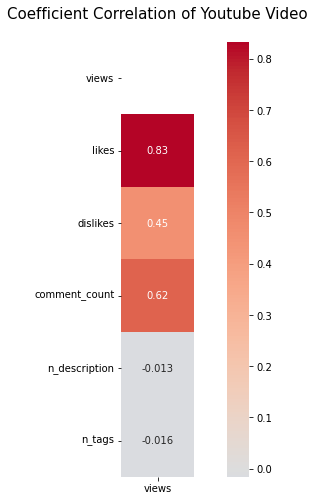

In [351]:
# Plotting on Heatmap
plt.figure(figsize=(12,8))
plt.title('Coefficient Correlation of Youtube Video\n', fontsize=15)

corr_df_tnt = df_tnt[['views', 'likes', 'dislikes', 'comment_count','n_description', 'n_tags']].corr()[['views']]

# Masking the views--views correlation
matrix = np.triu(corr_df_tnt)

sns.heatmap(data=corr_df_tnt, annot=True, cmap='coolwarm', center=0, mask=matrix, square=True)
plt.xticks(size=10)

plt.show()

From here we know that:
- 'likes' very strong positively correlated with 'views' with coef.corr of 0.83
- 'dislikes' moderate positively correlated with 'views' with coef.corr of 0.45
- 'comment_count' strong positively correlated with 'views' with coef.corr of 0.62
- 'n_description' (length of description) neutral / very weak correlated with 'views' with coef.corr of -0.013
- 'n_tags' (length of tag) neutral / very weak correlated with 'views' with coef.corr of -0.016

-----------------------

### Are there any differences between Trending and Not Trending `views`?


In [352]:
# Checking the 'views' column distribution
from scipy.stats import normaltest

stats, pvalue=normaltest(df_tnt['views'])
if pvalue<=0.05:
    print('does not distributed normaly')       #Ha
else: 
    print('distributed normaly')                #Ho 

does not distributed normaly


In [353]:
# Statistic Test
# Are there any differences between views trending videos and not?
# Because the data does not distributed normaly, we use mann whitney test.
from scipy.stats import mannwhitneyu

stats,pvalue=mannwhitneyu(*[df_tnt[df_tnt['trending_label']==i]['views'] for i in df_tnt['trending_label'].unique()], alternative='less')
if pvalue <= 0.05:
    # Ha --> 
    print('Reject Ho,', '\nWe have enough evidence to say that the median views of non-trending videos are less than the median views of trending videos')
else:
    # Ho --> 
    print('Failed to Reject Ho,', '\nWe do not have enough evidence to say that the median views of non-trending videos are less than the median views of trending videos')

Reject Ho, 
We have enough evidence to say that the median views of non-trending videos are less than the median views of trending videos


In [354]:
# Table of Median Views for Trending and Not Trending
df_tnt.groupby('trending_label')['views'].median().to_frame().reset_index()

,trending_label,views
0,Not Trending,459645.0
1,Trending,1085930.5


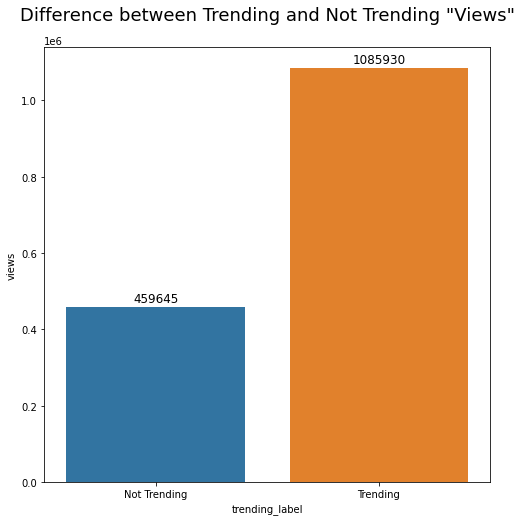

In [355]:
# Defining the plot size
plt.figure(figsize=(8, 8))
plt.title('Difference between Trending and Not Trending "Views"\n', size=18)

plots = sns.barplot(data=df_tnt.groupby('trending_label')['views'].median().to_frame().reset_index(), x='trending_label', y='views')

# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
                   
plt.show()

Is the `most viewed` video also trending video?
- Yes, from here we know that `most viewed` video also trending video

In [356]:
# Most viewed video
df_tnt[(df_tnt['views']==df_tnt['views'].max())]

,video_id,trending_label,publish_time_year,publish_time,trending_date,title,channel_title,category,views,likes,dislikes,comment_count,description,tags,comments_disabled,view_class,video_temperature,n_video_temperature,n_description,n_tags
3892,VYOjWnS4cMY,Trending,2018-05-06,04:00:07,2018-05-20,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,156612892,4110879,261521,437053,“This is America” by Childish Gambino http://s...,"[Childish Gambino, Rap, This Is America, mcDJ ...",False,100M,14 days,14,227.0,69.0


-----------------------------

### Are there any differences between Trending and Not Trending `likes`?


In [357]:
# Checking the 'likes' column distribution
stats, pvalue=normaltest(df_tnt['likes'])
if pvalue<=0.05:
    print('does not distributed normaly')       #Ha
else: 
    print('distributed normaly')                #Ho 

does not distributed normaly


In [358]:
# Statistic Test
# Are there any differences between likes trending videos and not?
# Because the data does not distributed normaly, we use mann whitney test.

stats,pvalue=mannwhitneyu(*[df_tnt[df_tnt['trending_label']==i]['likes'] for i in df_tnt['trending_label'].unique()], alternative='less')
if pvalue <= 0.05:
    # Ha 
    print('Reject Ho', '\nWe have enough evidence to say that the median likes of non-trending videos are smaller than the median likes of trending videos')
else:
    # Ho 
    print('Failed to Reject Ho', '\nWe do not have enough evidence to say that the median likes of non-trending videos are smaller than the median likes of trending videos')

Reject Ho 
We have enough evidence to say that the median likes of non-trending videos are smaller than the median likes of trending videos


In [359]:
# Table of Median Likes for Trending and Not Trending
df_tnt.groupby('trending_label')['likes'].median().to_frame().reset_index()

,trending_label,likes
0,Not Trending,13230.0
1,Trending,24594.0


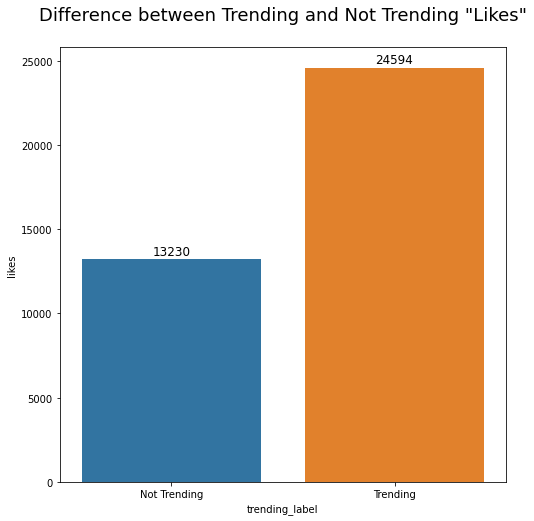

In [360]:
# Defining the plot size
plt.figure(figsize=(8, 8))
plt.title('Difference between Trending and Not Trending "Likes"\n', size=18)

plots = sns.barplot(data=df_tnt.groupby('trending_label')['likes'].median().to_frame().reset_index(), x='trending_label', y='likes')

# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.show()

Is the `most liked` video also trending video?
- Yes, from here we know that `most liked` video also trending video.

In [361]:
# Most liked video
df_tnt[(df_tnt['likes']==df_tnt['likes'].max())]

,video_id,trending_label,publish_time_year,publish_time,trending_date,title,channel_title,category,views,likes,dislikes,comment_count,description,tags,comments_disabled,view_class,video_temperature,n_video_temperature,n_description,n_tags
3899,7C2z4GqqS5E,Trending,2018-05-18,09:00:02,2018-05-25,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,92054928,5232318,179451,1163977,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,"[BIGHIT, 빅히트, 방탄소년단, BTS, BANGTAN, 방탄, FAKE LO...",False,50-90M,7 days,7,784.0,77.0


--------------------

### Are there any differences between Trending and Not Trending `dislikes`?

In [362]:
# Checking the 'dislike' column distribution
stats, pvalue=normaltest(df_tnt['dislikes'])
if pvalue<=0.05:
    print('does not distributed normaly')       #Ha
else: 
    print('distributed normaly')                #Ho 

does not distributed normaly


In [363]:
# Statistic Test
# Are there any differences between dislikes trending videos and not?
# Because the data does not distributed normaly, we use mann whitney test.

stats,pvalue=mannwhitneyu(*[df_tnt[df_tnt['trending_label']==i]['dislikes'] for i in df_tnt['trending_label'].unique()], alternative='less')
if pvalue <= 0.05:
    # Ha 
    print('Reject Ho', '\nWe have enough evidence to say that the median dislikes of trending videos are less than the median dislikes of trending videos')
else:
    # Ho 
    print('Failed to Reject Ho', '\nWe do not have enough evidence to say that the median dislikes of trending videos are less than the median dislikes of trending videos')

Reject Ho 
We have enough evidence to say that the median dislikes of trending videos are less than the median dislikes of trending videos


In [364]:
# Table of Median Dislikes for Trending and Not Trending
df_tnt.groupby('trending_label')['dislikes'].median().to_frame().reset_index()

,trending_label,dislikes
0,Not Trending,444.5
1,Trending,1001.5


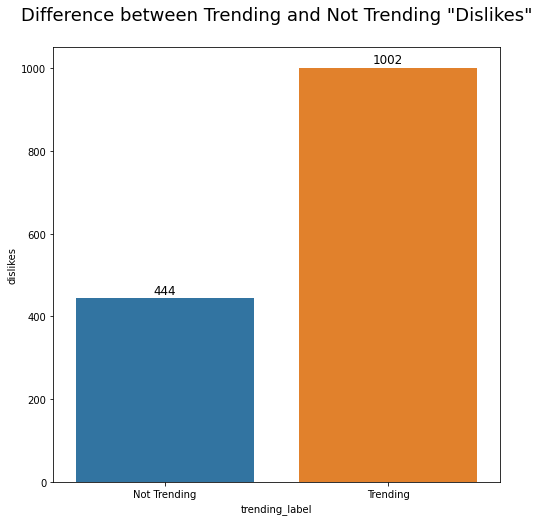

In [365]:
# Defining the plot size
plt.figure(figsize=(8, 8))
plt.title('Difference between Trending and Not Trending "Dislikes"\n', size=18)

plots = sns.barplot(data=df_tnt.groupby('trending_label')['dislikes'].median().to_frame().reset_index(), x='trending_label', y='dislikes')

# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
                   
plt.show()

Is the `most disliked` video not trending video?
- No, from here we know that `most disliked` video also trending video.
- since 'dislikes' moderate positively correlated with 'views' with coef.corr of 0.45, it is possible to contributed to Trending video

In [366]:
# Most disliked video
df_tnt[(df_tnt['dislikes']==df_tnt['dislikes'].max())]

,video_id,trending_label,publish_time_year,publish_time,trending_date,title,channel_title,category,views,likes,dislikes,comment_count,description,tags,comments_disabled,view_class,video_temperature,n_video_temperature,n_description,n_tags
784,QwZT7T-TXT0,Trending,2018-01-02,16:42:21,2018-01-06,So Sorry.,Logan Paul Vlogs,Entertainment,31675237,1275142,1415777,1194249,-,"[logan paul vlog, logan paul, logan, paul, oly...",False,10-40M,4 days,4,0.0,270.0


---------------

### Are there any differences between Trending and Not Trending `comments`?

In [367]:
# Checking the 'comment_count' column distribution
stats, pvalue=normaltest(df_tnt['comment_count'])
if pvalue<=0.05:
    print('does not distributed normaly')       #Ha
else: 
    print('distributed normaly')                #Ho 

does not distributed normaly


In [368]:
# Statistic Test
# Are there any differences between comment_count trending videos and not?
# Because the data does not distributed normaly, we use mann whitney test.

stats,pvalue=mannwhitneyu(*[df_tnt[df_tnt['trending_label']==i]['comment_count'] for i in df_tnt['trending_label'].unique()], alternative='less')
if pvalue <= 0.05:
    # Ha 
    print('Reject Ho', '\nWe have enough evidence to say that the median number of comments on videos that are not trending is smaller than the median number of comments on trending videos')
else:
    # Ho 
    print('Failed to Reject Ho', '\nWe do not have enough evidence to say that the median number of comments on videos that are not trending is smaller than the median number of comments on trending videos')

Reject Ho 
We have enough evidence to say that the median number of comments on videos that are not trending is smaller than the median number of comments on trending videos


In [369]:
# Table of Median Comment Count for Trending and Not Trending
df_tnt.groupby('trending_label')['comment_count'].median().to_frame().reset_index()

,trending_label,comment_count
0,Not Trending,1360.0
1,Trending,2759.0


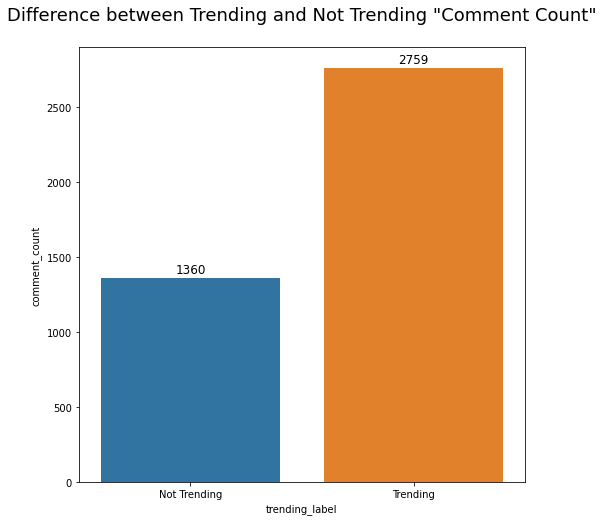

In [370]:
# Defining the plot size
plt.figure(figsize=(8, 8))
plt.title('Difference between Trending and Not Trending "Comment Count"\n', size=18)

plots = sns.barplot(data=df_tnt.groupby('trending_label')['comment_count'].median().to_frame().reset_index(), x='trending_label', y='comment_count')

# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
                   
plt.show()

Is the `most comments` video also trending video?
- Yes, from here we know that `most comments` video also trending video.

In [371]:
# Most commented video
df_tnt[(df_tnt['comment_count']==df_tnt['comment_count'].max())]

,video_id,trending_label,publish_time_year,publish_time,trending_date,title,channel_title,category,views,likes,dislikes,comment_count,description,tags,comments_disabled,view_class,video_temperature,n_video_temperature,n_description,n_tags
784,QwZT7T-TXT0,Trending,2018-01-02,16:42:21,2018-01-06,So Sorry.,Logan Paul Vlogs,Entertainment,31675237,1275142,1415777,1194249,-,"[logan paul vlog, logan paul, logan, paul, oly...",False,10-40M,4 days,4,0.0,270.0


------------

### Are there any differences between Trending and Not Trending `description`?

In [372]:
# Checking the 'n_description' column distribution
stats, pvalue=normaltest(df_tnt['n_description'])
if pvalue<=0.05:
    print('does not distributed normaly')       #Ha
else: 
    print('distributed normaly')                #Ho 

does not distributed normaly


In [373]:
# Statistic Test
# Are there any differences between length description trending videos and not?
# Because the data does not distributed normaly, we use mann whitney test.

stats,pval=mannwhitneyu(*[df_tnt[df_tnt['trending_label']==i]['n_description'] for i in df_tnt['trending_label'].unique()], alternative='less')
if pval <= 0.05:
    # Ha 
    print('Reject Ho', '\nWe have enough evidence to say that the length of the description of a non-trending video is less than the median length of the description of a trending video')
else:
    # Ho 
    print('Failed to Reject Ho', '\nWe do not have enough evidence to say that the length of the description of a non-trending video is less than the median length of the description of a trending video')

Failed to Reject Ho 
We do not have enough evidence to say that the length of the description of a non-trending video is less than the median length of the description of a trending video


In [374]:
# Table of Median description length for Trending and Not Trending
df_tnt.groupby('trending_label')['n_description'].median().to_frame().reset_index().rename(columns={'n_description':'description length'})

,trending_label,description length
0,Not Trending,901.0
1,Trending,817.5


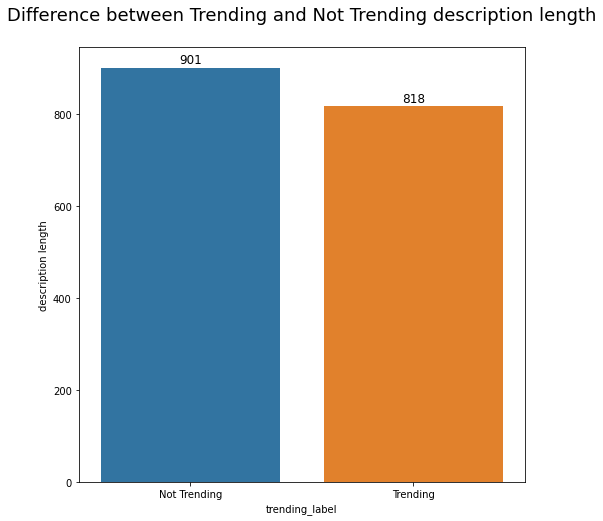

In [375]:
# Defining the plot size
plt.figure(figsize=(8, 8))
plt.title('Difference between Trending and Not Trending description length\n', size=18)

plots = sns.barplot(data=df_tnt.groupby('trending_label')['n_description'].median().to_frame().reset_index().rename(columns={'n_description':'description length'}), x='trending_label', y='description length')

# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
                   
plt.show()

------------

### Are there any differences between Trending and Not Trending `tags`?

In [376]:
# Checking the 'n_tags' column distribution
stats, pvalue=normaltest(df_tnt['n_tags'])
if pvalue<=0.05:
    print('does not distributed normaly')       #Ha
else: 
    print('distributed normaly')                #Ho 

does not distributed normaly


In [377]:
# Statistic Test
# Are there any differences between length tags trending videos and not?
# Because the data does not distributed normaly, we use mann whitney test.

stats,pval=mannwhitneyu(*[df_tnt[df_tnt['trending_label']==i]['n_tags'] for i in df_tnt['trending_label'].unique()], alternative='less')
if pval <= 0.05:
    # Ha 
    print('Reject Ho', '\nWe have enough evidence to say that the length tags of the non-trending video is less than the median of the length tags of the trending video')
else:
    # Ho 
    print('Failed to Reject Ho', '\nWe do not have enough evidence to say that the length tags of the non-trending video is less than the median of the length tags of the trending video')

Failed to Reject Ho 
We do not have enough evidence to say that the length tags of the non-trending video is less than the median of the length tags of the trending video


In [378]:
# Table of Median tags length for Trending and Not Trending
df_tnt.groupby('trending_label')['n_tags'].mean().to_frame().reset_index().rename(columns={'n_tags':'tags length'})

,trending_label,tags length
0,Not Trending,296.036900
1,Trending,275.785456


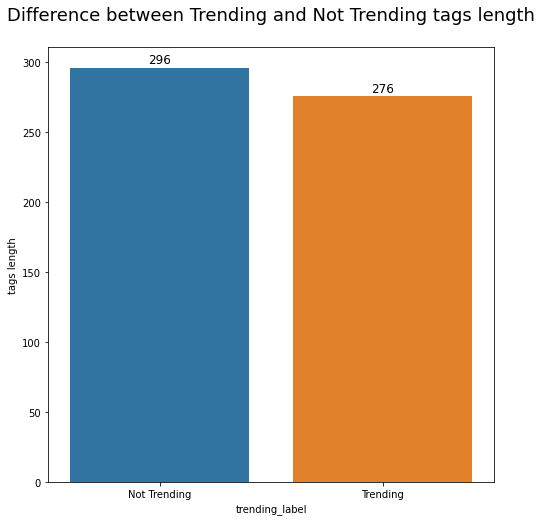

In [379]:
# Defining the plot size
plt.figure(figsize=(8, 8))
plt.title('Difference between Trending and Not Trending tags length\n', size=18)

plots = sns.barplot(data=df_tnt.groupby('trending_label')['n_tags'].mean().to_frame().reset_index().rename(columns={'n_tags':'tags length'}), x='trending_label', y='tags length')

# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
                   
plt.show()

## From the statistic testing above we can conclude that `views`, `likes`, `dislikes`, and `comment counts` having positively correlated with Trending Youtube

----------------

## Number of videos `per Category`

In [380]:
# Number of videos per category
vid_per_cat = df_tnt.groupby('category')['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'video_id':'number of videos'})
vid_per_cat

,category,number of videos
0,Entertainment,1285
1,Music,675
2,Comedy,472
3,Howto & Style,464
4,People & Blogs,390
5,Sports,346
6,Science & Technology,286
7,News & Politics,283
8,Film & Animation,228
9,Education,208


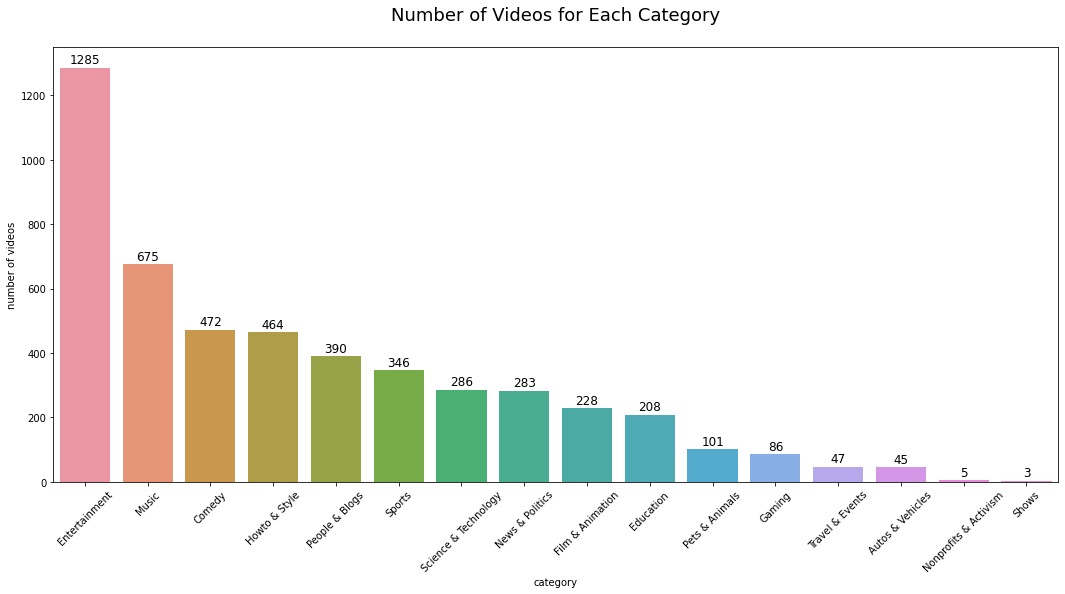

In [381]:
# Defining the plot size
plt.figure(figsize=(18, 8))
plt.title('Number of Videos for Each Category\n', size=18)


plots = sns.barplot(data=vid_per_cat, y='number of videos', x='category')

# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation = 45)

plt.show()

## Side by side Comparisson Trending and Not Trending for each category 

In [382]:
# Videos each category
df_ct=pd.crosstab(df_tnt['category'], df_tnt['trending_label'])
df_ct['Total']=df_ct.sum(axis=1)
df_ct['Trending_Rate'] = round((df_ct['Trending']/df_ct['Total']) * 100, 2)
df_ct.sort_values('Trending_Rate',ascending=False)

trending_label,Not Trending,Trending,Total,Trending_Rate
category,,,,
Autos & Vehicles,15,30,45,66.67
Shows,1,2,3,66.67
Gaming,30,56,86,65.12
Film & Animation,111,117,228,51.32
News & Politics,138,145,283,51.24
People & Blogs,202,188,390,48.21
Sports,186,160,346,46.24
Howto & Style,252,212,464,45.69
Music,370,305,675,45.19


In [383]:
df_ct[['Not Trending','Trending','Total']].sort_values('Total', ascending=False)

trending_label,Not Trending,Trending,Total
category,,,
Entertainment,748,537,1285
Music,370,305,675
Comedy,275,197,472
Howto & Style,252,212,464
People & Blogs,202,188,390
Sports,186,160,346
Science & Technology,163,123,286
News & Politics,138,145,283
Film & Animation,111,117,228


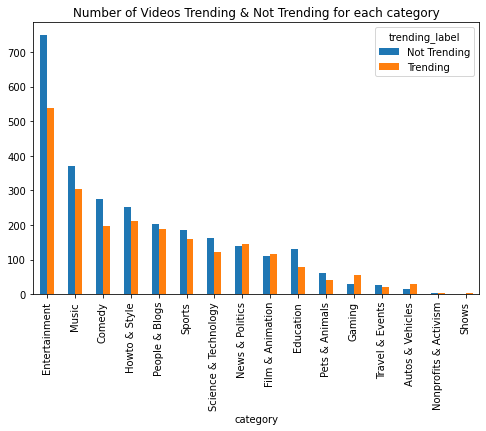

In [384]:
# Side by side comparisson trending and not trending videos for each category
df_ct.sort_values('Total',ascending=False).drop(columns=['Total','Trending_Rate']).plot(kind='bar',figsize=(8,5), 
title='Number of Videos Trending & Not Trending for each category')
plt.show()

## Popular Category of User Choice
We also decided to check which category overall had the most likes from all the categories.

In [385]:
temp = df_tnt
temp = temp.groupby('category')[['views', 'likes', 'comment_count']].apply(lambda x: x.astype(int).sum())
temp = temp.sort_values(by='likes', ascending=False).reset_index()

# Top 5 Category of User Choice
temp.head()

,category,views,likes,comment_count
0,Music,2977106022,127974064,11652319
1,Entertainment,2273279519,58903865,8764142
2,Comedy,654148225,27342996,2768671
3,People & Blogs,573469106,21075152,2882072
4,Howto & Style,428829324,17957371,2637675


### As we can see, `most viewed, liked, and comments` category is `Music`, followed up by Entertainment, Comedy, People & Blogs and Howto & Style. This shows user preference to use YouTube as an *Entertainment-ish* platform.

In [386]:
# Top 5 Higher chance Category to achive Trending Youtube
df_percentage = df_ct.sort_values('Trending_Rate',ascending=False).head()
df_percentage

trending_label,Not Trending,Trending,Total,Trending_Rate
category,,,,
Autos & Vehicles,15,30,45,66.67
Shows,1,2,3,66.67
Gaming,30,56,86,65.12
Film & Animation,111,117,228,51.32
News & Politics,138,145,283,51.24


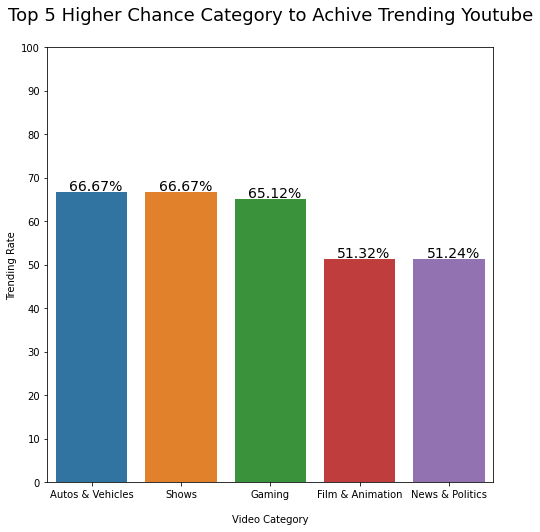

In [387]:
# Defining the plot size
plt.figure(figsize=(8, 8))
plt.title('Top 5 Higher Chance Category to Achive Trending Youtube\n', size=18)

plots = sns.barplot(data=df_percentage, x=df_percentage.index, y='Trending_Rate')

# Iterrating over the bars one-by-one

for bar in plots.patches:
        percentage = '{:.2f}%'.format(bar.get_height())
        x = bar.get_x() + bar.get_width() / 2 - 0.25
        y = bar.get_y() + bar.get_height() + 0.38
        plots.annotate(percentage, (x, y), size = 14)


plt.xlabel('\nVideo Category')
plt.ylabel('Trending Rate')
plt.ylim(0,100,10)
plt.yticks([i for i in range(0,101,10)])

plt.show()

### We suggest you to start with this 4 category (Autos & Vehicles, Gaming, Film & Animation, and News & Politics) where you have better chance to trending about above 50% chance for category of their own.

`note:` however we can not guaranteed 'show' category, because of limited data that we have.

## Top 10 most viewed videos that are on Trending 
here we want to know what category for top 10 trending videos

In [388]:
df_tnt_top5 = df_tnt[(df_tnt['trending_label']=='Trending')].sort_values('views', ascending=False).head(10)
df_tnt_top5 = df_tnt_top5[['channel_title', 'title', 'category', 'views', 'likes', 'comment_count']].reset_index().drop(columns={'index'})
df_tnt_top5

,channel_title,title,category,views,likes,comment_count
0,ChildishGambinoVEVO,Childish Gambino - This Is America (Official V...,Music,156612892,4110879,437053
1,YouTube Spotlight,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Entertainment,100911567,2656659,682890
2,ibighit,BTS (방탄소년단) 'FAKE LOVE' Official MV,Music,92054928,5232318,1163977
3,Marvel Entertainment,Marvel Studios' Avengers: Infinity War Officia...,Entertainment,80360459,2513099,335920
4,ArianaGrandeVevo,Ariana Grande - No Tears Left To Cry,Music,74523616,2562936,211699
5,MalumaVEVO,Maluma - El Préstamo (Official Video),Music,68480947,733499,33326
6,Sony Pictures Entertainment,VENOM - Official Trailer (HD),Entertainment,55552122,1265757,136872
7,Cardi B,"Cardi B, Bad Bunny & J Balvin - I Like It [Off...",Music,54680032,1498475,88335
8,jypentertainment,TWICE What is Love? M/V,Music,54540167,1237042,228484
9,TaylorSwiftVEVO,Taylor Swift - Delicate,Music,50807655,1743672,153489


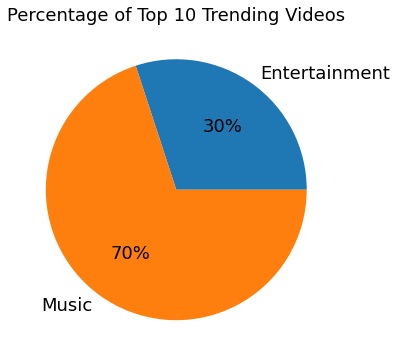

In [389]:
plt.figure(figsize=(6,6),facecolor='white')
plt.title('Percentage of Top 10 Trending Videos', size=18)
plt.pie(
    x= df_tnt_top5.groupby('category')[['views']].sum().reset_index()['views'],            
    labels= df_tnt_top5.groupby('category')[['views']].sum().reset_index()['category'],    
    autopct='%1.f%%',                   
    textprops={'fontsize': 18}
)
plt.show()

7 out of 10 Trending videos, are Music Category and the rest of them are Entertainment

## Days needed for Video to be Trending

In [390]:
# Counting average view for each days
df_tnt_temp = df_tnt[df_tnt['trending_label']=='Trending'].groupby('n_video_temperature')['views'].mean().to_frame().reset_index().rename(columns={'views':'number of views', 'n_video_temperature':'number of days'})
df_tnt_temp.head()

,number of days,number of views
0,0,3.238183e+06
1,1,1.928878e+06
2,2,1.950862e+06
3,3,1.673099e+06
4,4,2.339929e+06


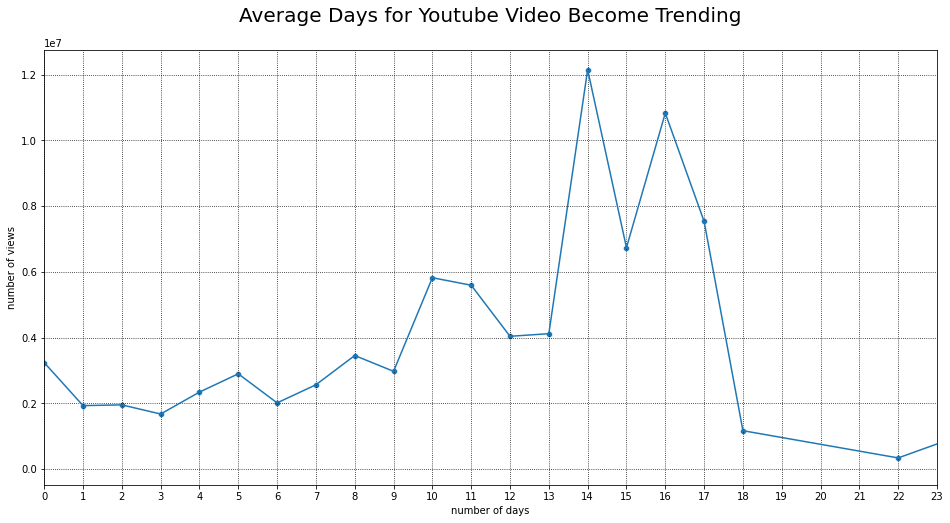

In [391]:
plt.figure(figsize=(16,8))

plt.title('Average Days for Youtube Video Become Trending\n', size=20)

sns.lineplot(data=df_tnt_temp, x='number of days', y='number of views')
sns.scatterplot(data=df_tnt_temp, x='number of days', y='number of views')

plt.grid(True, color='k', linestyle=':')

plt.xlim(0,23)
plt.xticks([i for i in range(24)])

plt.show()

### A video approximately needed 14 to 16 days to be Trending

## Tags that's Frequently Used in Trending Youtube
Next, we decided to move onto the tags often attached to the video and video descriptions. Tags are often attached to videos to make them easier to search up and to include them into their relevant categories. Descriptions are written to by the up-loaders, often either giving a brief description of the video or adding relevant links. For this purpose, we used a Word Cloud, where the most often appearing tag words appear the largest.

In [392]:
# Importing wordcloud, STOPWORDS
from wordcloud import WordCloud, STOPWORDS

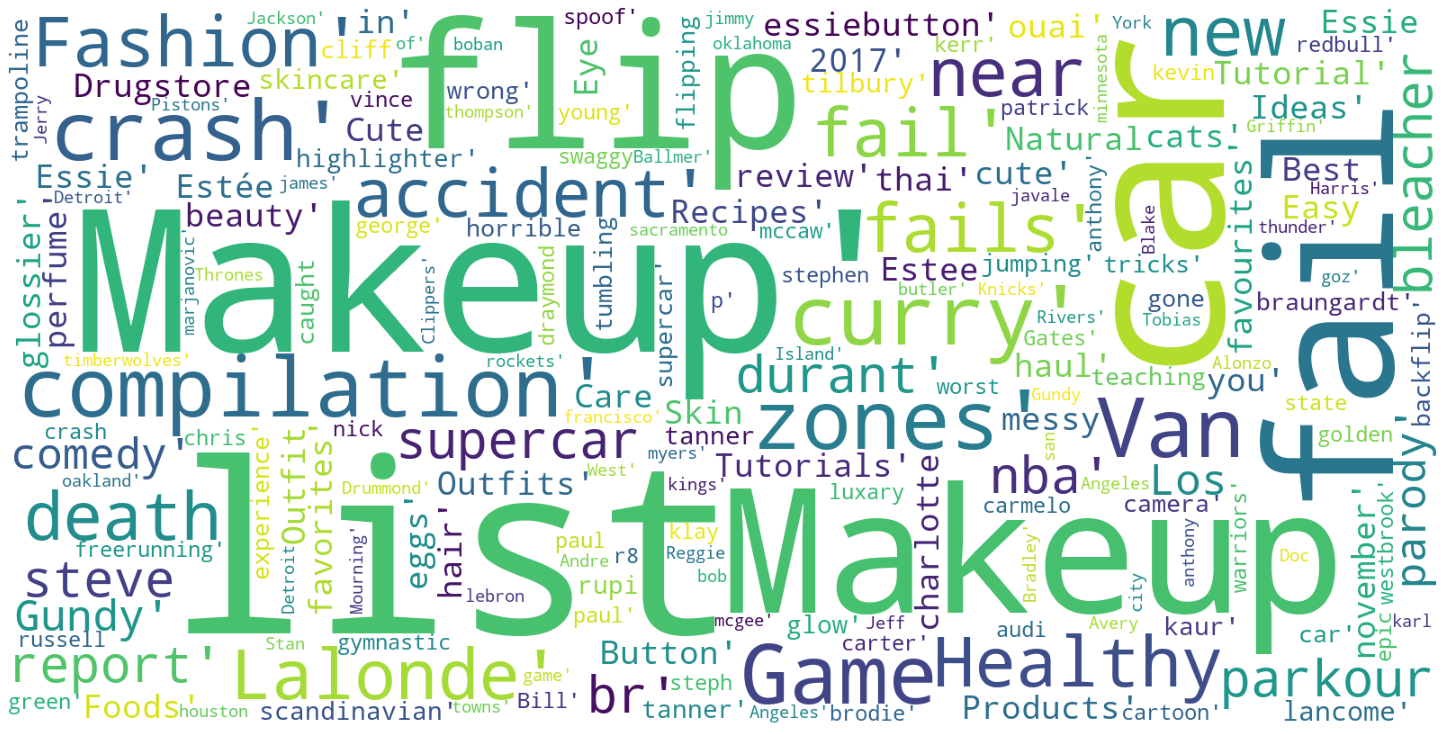

In [393]:
# Inserting tags column to wordcloud
text = df_tnt[df_tnt['trending_label']=='Trending']['tags'].values
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(str(text))

plt.figure( figsize=(20,10), facecolor='w')
# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

These are most used tags in Trending Videos, eventhough from correlation and statistic test we cannot proven tags affect/corelated with trending youtube algorithm, but using top used tags won't hurt your channel. 